In [1]:
from models.Unet import UNet
from dataset.data import BatchMaker
from utils.metrics import SegmentationMetrics
import torch
import yaml
import numpy as np
import matplotlib.pyplot as plt



In [2]:
BATCH = 1
path_to_config = '/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Kod/config/config_lab.yaml'
with open(path_to_config, 'r') as config_file:
    config = yaml.safe_load(config_file)
model_path = config['save_model_path'] + '/mixedGT1_best_model'


annotator1 = BatchMaker(config_path=path_to_config, batch_size=BATCH, mode = 'all',segment = 'mixed',annotator= 1)
train_GT1 = annotator1.train_loader
annotator2 = BatchMaker(config_path=path_to_config, batch_size=BATCH, mode = 'all',segment = 'mixed',annotator= 2)
train_GT2 = annotator2.train_loader

/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test_small
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test_small
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test


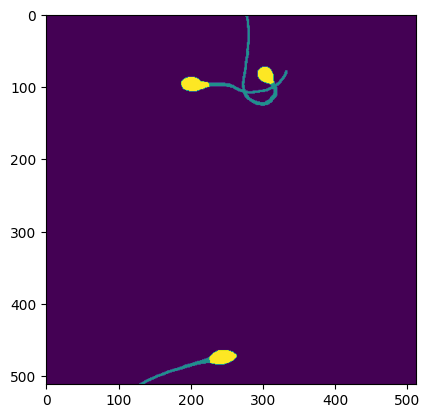

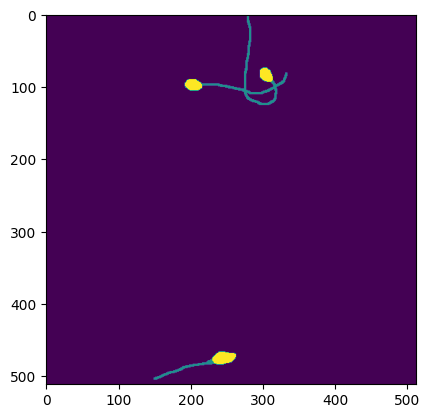

IoU scores for each class: [0.9939750840052808, 0.3689429403379839, 0.722969509149901]
Mean IoU score: 0.6952958444977219
Jaccard score for class 0: 0.9939750840052808
Jaccard score for class 1: 0.3689429403379839
Jaccard score for class 2: 0.722969509149901


In [3]:
from sklearn.metrics import (
    jaccard_score,
    average_precision_score
)

input_images = []
class_masks = []
true_masks = []  

input_images1 = []
class_masks1 = []
true_masks1 = []  
all_true_class_ids = []
all_pred_class_ids = []


for inputs, labels, ids in train_GT1:
    input_images.append(inputs)
    true_masks.append(labels)  
    class_masks.append(ids)

input_images = np.concatenate(input_images, axis=0)
true_masks = np.concatenate(true_masks, axis=0) 
class_masks = np.concatenate(class_masks, axis=0) 


for inputs, labels, ids in train_GT2:
    input_images1.append(inputs)
    true_masks1.append(labels)  
    class_masks1.append(ids)

input_images1 = np.concatenate(input_images1, axis=0)
true_masks1 = np.concatenate(true_masks1, axis=0) 
class_masks1 = np.concatenate(class_masks1, axis=0) 

true_masks1 = true_masks1.transpose((0, 2, 3, 1))
#class_masks1 = class_masks1.transpose((0, 2, 3, 1))


plt.imshow(class_masks[2])
plt.figure()
plt.imshow(class_masks1[2])
plt.show()


metrics = SegmentationMetrics(3)
metrics.update_confusion_matrix(class_masks, class_masks1)
iou_per_class = metrics.calculate_iou_per_class()
mean_iou = metrics.mean_iou()
print("IoU scores for each class:", iou_per_class)
print("Mean IoU score:", mean_iou)

all_pred_class_ids = []
all_true_class_ids = []
for true, pred in zip(class_masks, class_masks1):
    # Przekształć maski z formatu one-hot do formatu identyfikatorów klas
    true_class_id = true
    pred_class_id = pred
    # Dodaj identyfikatory klas do list
    all_true_class_ids.append(true_class_id.flatten())
    all_pred_class_ids.append(pred_class_id.flatten())

# Połącz wszystkie identyfikatory klas w jedną listę
all_true_class_ids = np.concatenate(all_true_class_ids)
all_pred_class_ids = np.concatenate(all_pred_class_ids)

IoU_per_class = jaccard_score(all_true_class_ids, all_pred_class_ids, average=None)

for i, IoU in enumerate(IoU_per_class):
    print(f'Jaccard score for class {i}: {IoU}')

#IoU_per_class = jaccard_score(all_true_class_ids, all_pred_class_ids, average=None)



In [4]:
all_true_class_ids.shape

(113246208,)

TypeError: Invalid shape (512,) for image data

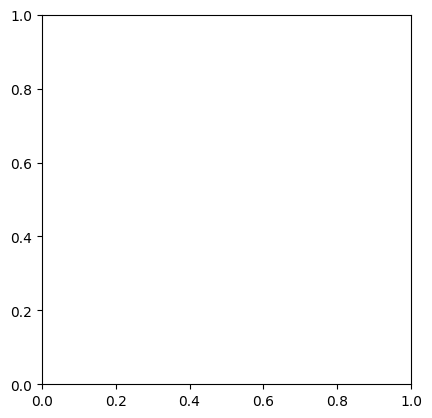

In [5]:
import matplotlib.pyplot as plt 
num_classes = 3

labels1 = []
labels2 = []
for i in range(len(train_GT1.dataset)):
    labels1.append(train_GT1.dataset.__getitem__(i)[2][0])
    labels2.append(train_GT2.dataset.__getitem__(i)[2][0])
label1np = np.array(labels1)
label2np = np.array(labels2)

plt.imshow(label1np[0])
plt.figure()
plt.imshow(label2np[0])
plt.show()

metrics = SegmentationMetrics(num_classes)
metrics.update_confusion_matrix(label1np, label2np)
iou_per_class = metrics.calculate_iou_per_class()
mean_iou = metrics.mean_iou()

print("Jaccard scores for each class:", iou_per_class)

#print("IoU: {}".format(IoU))
#print("Average Precision: {}".format(average_precision))    

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,